# PCA pojednostavljena

 - statistička procedura
 - ortogonalne transformacije (transformacije koordinatnih sistema)
 - konverzija skupa merenja 
 
Ako je jedno merenje opisano preko atributa (x, y) i ako postoji linearna zavisnost (korelacija) između x i y zadatak PCA je pronaći transformaciju   (matricu $v$) takvu da kad se prostor x y transformiše u $x'$ i $y'$ su varijacije podataka u $x'$ ili $y'$ jako male. Dimenziju u kojoj su varijacije ulaznih vrednosti jako male možemo da zanemarimo.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
%matplotlib inline
import pandas as pd

np.set_printoptions(precision=3)

Simulacija merenja dve veličine $x$ i $y$. Stanje sistema koji se meri je takvo da postoji zavisnost promene veličine $y$ u odnosu na $x$. 

In [2]:
err = 0.1

x = np.linspace(2, 5, 100)
y = 2+0.5*x+2*err*np.random.rand(len(x))-err


Zavisnost među merenim veličinama 'teško' možemo videti direktno.

In [3]:
data = pd.DataFrame(np.column_stack((x,y)), columns=list('xy'))
data.head()

,x,y
0,2.000000,3.016556
1,2.030303,3.017601
2,2.060606,3.114210
3,2.090909,3.051022
4,2.121212,3.007605


In [4]:
data.tail()

,x,y
95,4.878788,4.523426
96,4.909091,4.468924
97,4.939394,4.519976
98,4.969697,4.399742
99,5.000000,4.411230


In [5]:
data.describe()

,x,y
count,100.000000,100.000000
mean,3.500000,3.748206
std,0.879136,0.439646
min,2.000000,3.003187
25%,2.750000,3.351746
50%,3.500000,3.758700
75%,4.250000,4.128922
max,5.000000,4.523426


x merenja variraju između 2 i 5 a y merenja variraju između 3 i 4.5


Lakše je nakon što se merenja prikažu grafički.

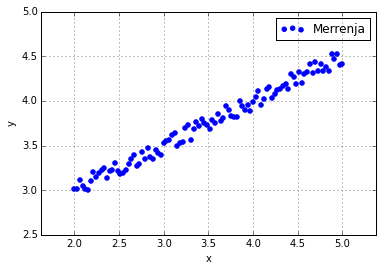

In [6]:
plt.scatter(x, y, color='b', label='Merrenja');
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

## Korak 1
Transformisati podatke tako da srednja vrednost bude 0. 
 - odrediti srednju vrednost po svakoj dimenziji
 - oduzeti tako da srednja vrednost transformisanih podataka bude 0

In [21]:
xx = np.zeros((len(x), 2)) 
xx[:, 0] = x
xx[:, 1] = y

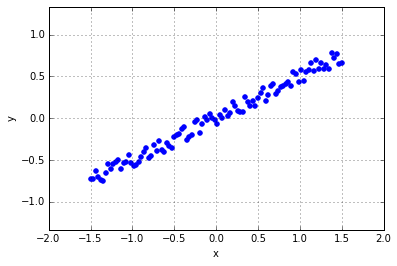

In [22]:
xx = xx - xx.mean(axis=0)

plt.scatter(xx[:,0], xx[:,1], color='b');
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

## Korak 2
Odrediti matricu $a$ razlika vrednosti u odnosu na srednju vrednost.

In [23]:
n = xx.shape[0]
a = xx-np.dot(np.ones((n,n)),xx)/n

#data = pd.DataFrame(a, columns=list('xy'))
#data.describe()

## Korak 3
Izračunati matricu kovarijansi

In [10]:
# covariance matrix
cm = np.dot(a.T, a)

print cm

[[ 76.515  37.91 ]
 [ 37.91   19.136]]


xx, xy

yx, yy

## Korak 4
Odrediti sopstvene vrednosti i sopstveni vektore matrice cm

In [11]:
w,v = linalg.eig(cm)

### Sopstvene vrednosti

In [24]:
print w

[ 95.368   0.283]


### Sopstveni vektori
Vektori su složeni po kolonama.

In [13]:
print v

[[ 0.895 -0.445]
 [ 0.445  0.895]]


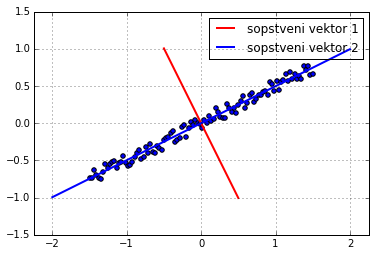

In [27]:
x1 = np.array([-0.5, 0.5])
f = v[0,:]
y1 = x1*f[0]/f[1]
plt.plot(x1, y1, 'r-', lw=2, label='sopstveni vektor 1')

x2 = np.array([-2, 2])
f2 = v[1,:]
y2 = x2*f2[0]/f2[1]
plt.plot(x2, y2, 'b-', lw=2, label='sopstveni vektor 2')

plt.scatter(xx[:,0:1],xx[:,1:2])

plt.axis('equal')
plt.grid(True)
plt.legend()

## Korak 5

Transformacija podataka korišćenjem sopstvenih vektora

In [15]:
zz = np.dot(xx[:,0:2], v)

In [16]:
data = pd.DataFrame(zz, columns=list('xy'))
data.describe()

,x,y
count,1.000000e+02,1.000000e+02
mean,-1.332268e-17,1.028344e-15
std,9.814844e-01,5.345031e-02
min,-1.668876e+00,-8.297098e-02
25%,-8.335199e-01,-4.895442e-02
50%,-1.845738e-02,1.713794e-03
75%,8.219840e-01,4.617876e-02
max,1.638319e+00,9.082307e-02


verdnosti x koordinate u novom prostoru variraju između -1.6 i 1.6 a vrednosti y koordinate -0.08 do 0.09

(-2.0, 2.0, -1.0, 1.0)

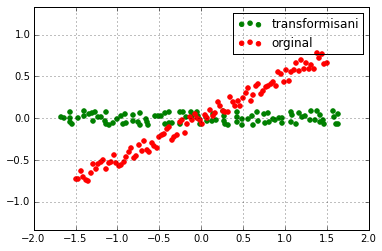

In [17]:
plt.scatter(zz[:,0:1],zz[:,1:2], color='g', label='transformisani')
plt.scatter(xx[:,0:1],xx[:,1:2], color='r', label='orginal')
plt.legend()
plt.grid(True)
plt.axis('equal')

## Korak 6 

Redukcija dimenzija

Dimenziju u kojoj se jako malo menjaju podaci možemo zanemariti.

In [18]:
zz[:,1] = 0

## Korak 7
Transformacija podataka u orginalni prostor

In [19]:
cc = np.dot(zz[:,0:2], v.T)

(-2.0, 2.0, -1.0, 1.0)

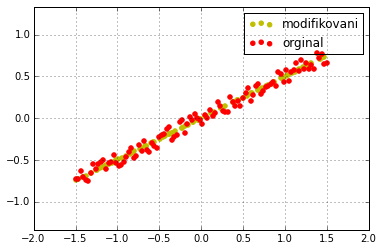

In [20]:
plt.scatter(cc[:,0:1],cc[:,1:2], color='y', label='modifikovani')
plt.scatter(xx[:,0:1],xx[:,1:2], color='r', label='orginal')
plt.legend()
plt.grid(True)
plt.axis('equal')